

# STEP 2 - RISK FACTOR ANALYSIS

##### Created by - Sanjana Tule 
##### Date - 23/08/2021

*   Analyse different risk factors seperately
*   Correlation between different risk factors
*   Apply right weightings and created a final risk factor column



In [1]:
# !pip install osmnx
# !apt install python3-rtree

In [17]:
# import libraries
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import requests
import osmnx as ox
import networkx as nx
import numpy as np
import seaborn as sn
from pandas.plotting import scatter_matrix
import matplotlib

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# STEP 1 - load the combined graph from disk
all_graph = nx.read_gpickle('/content/drive/My Drive/omdena/earthquake/1_all_graph_all_risk_added.pickle')
nodes_all,edges_all = ox.graph_to_gdfs(all_graph)

display(edges_all.head())
display(nodes_all.head())

osmid           name  ... bridge  tunnel
u          v          key                            ...               
29409715   6403348096 0     15240187   Chase Street  ...    NaN     NaN
           6403348099 0    400864506  Corbin Avenue  ...    NaN     NaN
           6403348105 0    400864518  Corbin Avenue  ...    NaN     NaN
6403348096 29409715   0     15240187   Chase Street  ...    NaN     NaN
           4269165902 0     15240187   Chase Street  ...    NaN     NaN

[5 rows x 17 columns]

,y,x,highway,street_count,evacuation_flag,evacuation_name,evacuation_type,ref,geometry
osmid,,,,,,,,,
29409715,34.224607,-118.562311,traffic_signals,4,N,NA,NaN,NaN,POINT (-118.56231 34.22461)
6403348096,34.224607,-118.562177,NaN,4,N,NA,NaN,NaN,POINT (-118.56218 34.22461)
6403348099,34.224686,-118.562311,NaN,4,N,NA,NaN,NaN,POINT (-118.56231 34.22469)
6403348105,34.224528,-118.562312,NaN,4,N,NA,NaN,NaN,POINT (-118.56231 34.22453)
4269165902,34.224610,-118.561699,NaN,3,N,NA,NaN,NaN,POINT (-118.56170 34.22461)


VISUALISE DISTANCE RISK


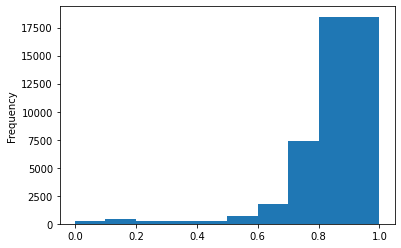

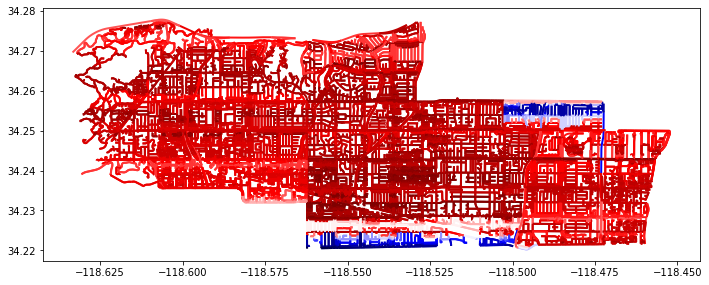

In [5]:
# STEP 2 - visualise different risk factors individually 

###  DISTANCE RISK SCORE ###

print("VISUALISE DISTANCE RISK")
edges_all['distance_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='distance_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm = matplotlib.colors.Normalize(vmin=edges_all['distance_risk_score'].min(), vmax=edges_all['distance_risk_score'].max()))
sm.set_array([])
#fig.colorbar(sm, ax=ax)
#ax.set_title('Visualizing risks')
fig.tight_layout()

VISUALISE SPEED RISK


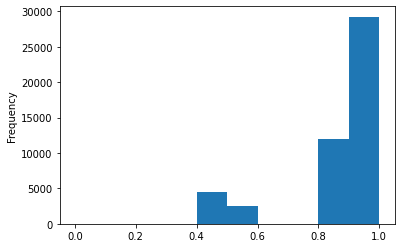

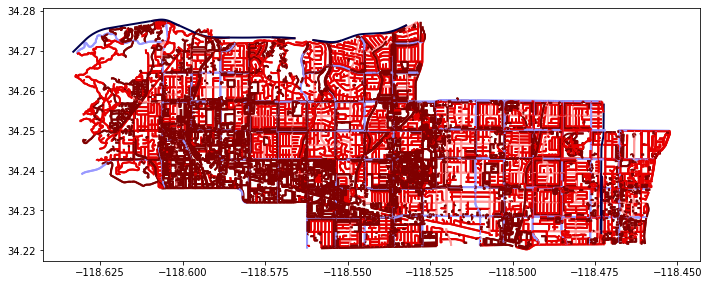

In [6]:
###  MAX SPEED RISK SCORE ###

print("VISUALISE SPEED RISK")
edges_all['max_speed_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)

fig, ax = plt.subplots(figsize=(10, 20))

# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='max_speed_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['max_speed_risk_score'].min(), vmax=edges_all['max_speed_risk_score'].max()))
sm.set_array([])
fig.tight_layout()

VISUALISE DENSITY RISK


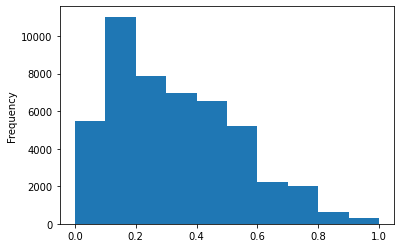

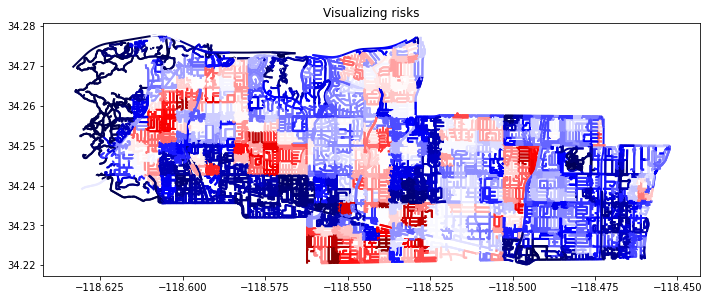

In [7]:
# STEP 2 - visualise different risk factors individually 

###  DENSITY RISK SCORE ###

print("VISUALISE DENSITY RISK")
edges_all['density_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='density_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['density_risk_score'].min(), vmax=edges_all['density_risk_score'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

VISUALISE WIDTH RISK


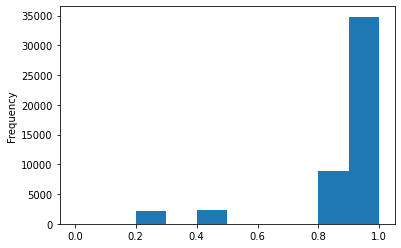

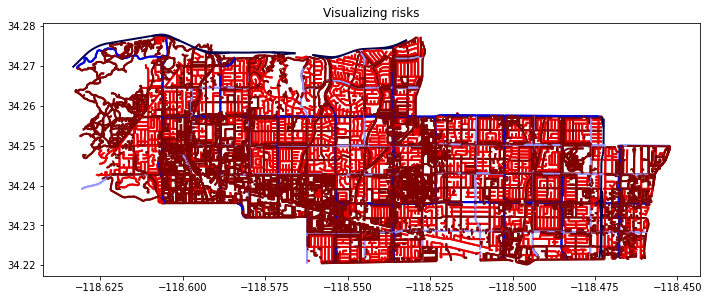

In [8]:
# STEP 2 - visualise different risk factors individually 

###  WIDTH RISK SCORE ###

print("VISUALISE WIDTH RISK")
edges_all['width_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='width_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['width_risk_score'].min(), vmax=edges_all['width_risk_score'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

VISUALISE LIQ RISK


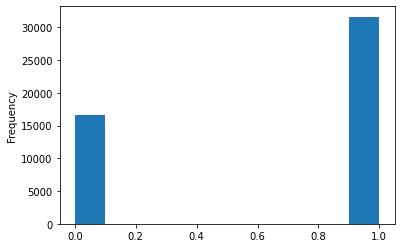

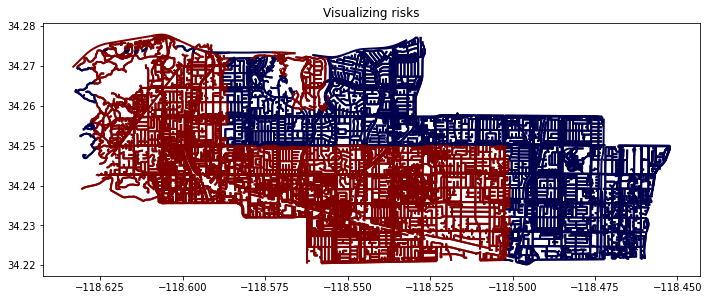

In [9]:
# STEP 2 - visualise different risk factors individually 

###  LIQ RISK SCORE ###

print("VISUALISE LIQ RISK")
edges_all['liq_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='liq_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['liq_risk_score'].min(), vmax=edges_all['liq_risk_score'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

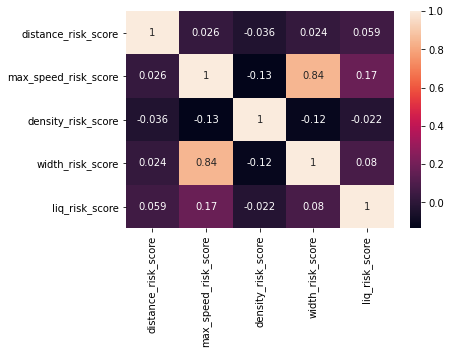

In [10]:
# STEP 3 - correlations between different risk factors
df = pd.DataFrame(edges_all,columns=['distance_risk_score','max_speed_risk_score','density_risk_score','width_risk_score','liq_risk_score'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='distance_risk_score', ylabel='distance_risk_score'>,
        <AxesSubplot:xlabel='max_speed_risk_score', ylabel='distance_risk_score'>,
        <AxesSubplot:xlabel='density_risk_score', ylabel='distance_risk_score'>,
        <AxesSubplot:xlabel='width_risk_score', ylabel='distance_risk_score'>,
        <AxesSubplot:xlabel='liq_risk_score', ylabel='distance_risk_score'>],
       [<AxesSubplot:xlabel='distance_risk_score', ylabel='max_speed_risk_score'>,
        <AxesSubplot:xlabel='max_speed_risk_score', ylabel='max_speed_risk_score'>,
        <AxesSubplot:xlabel='density_risk_score', ylabel='max_speed_risk_score'>,
        <AxesSubplot:xlabel='width_risk_score', ylabel='max_speed_risk_score'>,
        <AxesSubplot:xlabel='liq_risk_score', ylabel='max_speed_risk_score'>],
       [<AxesSubplot:xlabel='distance_risk_score', ylabel='density_risk_score'>,
        <AxesSubplot:xlabel='max_speed_risk_score', ylabel='density_risk_score'>,
        <AxesSubplot:xlabe

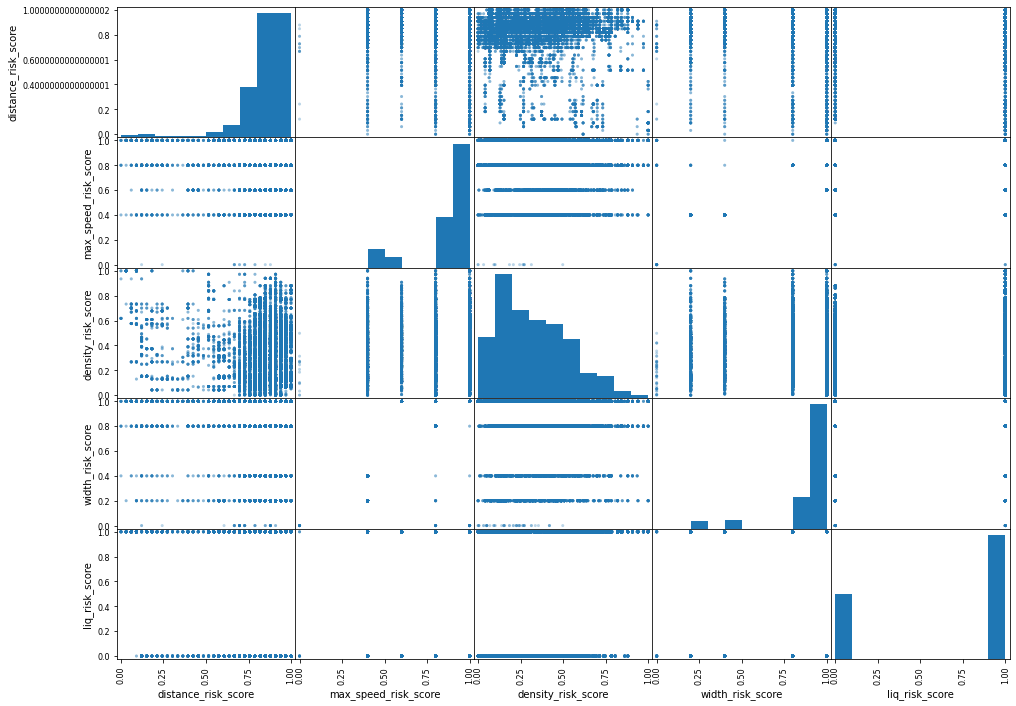

In [11]:
scatter_matrix(df,figsize=(16,12),alpha=0.3)

VISUALISE COMBINED RISK


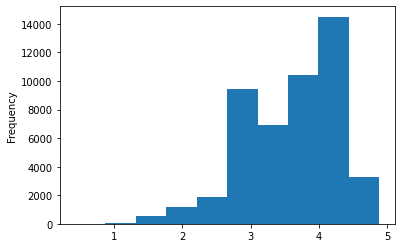

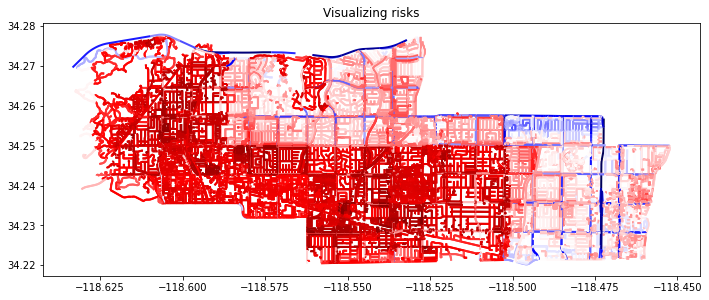

In [12]:
# STEP 4 - combine as it is

edges_all['combined_risk'] =  edges_all['distance_risk_score'] + edges_all['max_speed_risk_score'] + edges_all['density_risk_score'] + edges_all['width_risk_score'] + edges_all['liq_risk_score']
# 0 -5

print("VISUALISE COMBINED RISK")
edges_all['combined_risk'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='combined_risk', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['combined_risk'].min(), vmax=edges_all['combined_risk'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

VISUALISE COMBINED RISK


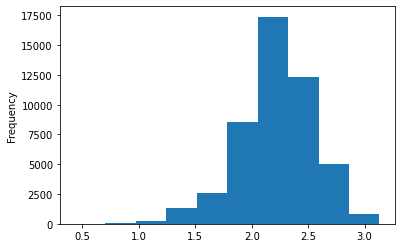

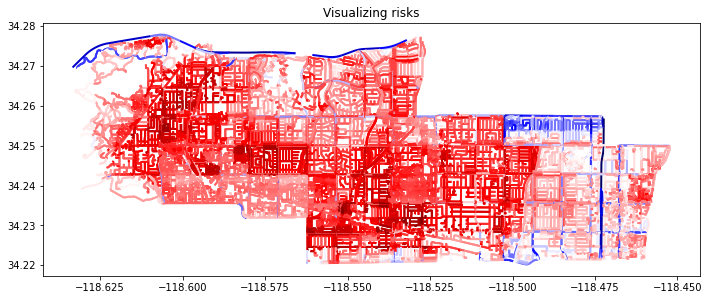

In [22]:
# STEP 5 - combine width and max speed as 1

edges_all['combined_risk'] =  edges_all['distance_risk_score'] + 0.5 * edges_all['max_speed_risk_score']  + 0.5 * edges_all['width_risk_score'] + 0.25 * edges_all['liq_risk_score'] + edges_all['density_risk_score']
# 0 - 4

print("VISUALISE COMBINED RISK")
edges_all['combined_risk'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='combined_risk', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['combined_risk'].min(), vmax=edges_all['combined_risk'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

In [23]:
# STEP 4 - SAVE AS PICKLE FILE
all_graph_combined_risk = ox.graph_from_gdfs(nodes_all,edges_all)
nx.write_gpickle(all_graph_combined_risk,'/content/drive/My Drive/omdena/earthquake/2_all_graph_all_risk_added.pickle')